## **1. Importación de librerías**

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import matplotlib.pyplot as plt
import seaborn as sns

## **2. Carga de datos `dataset_estudiantes.csv`**

Se importa el fichero `dataset_estudiantes` en un DataFrame utilizando `read_csv`.

In [2]:
df = pd.read_csv("../data/1.raw/dataset_estudiantes.csv")

#### **Columnas del dataset**

- **horas_estudio_semanal**: Número de horas de estudio a la semana.

- **nota_anterior**: Nota que obtuvo el alumno en la convocatoria anterior.

- **tasa_asistencia**: Tasa de asistencia a clase en porcentaje.

- **horas_sueno**: Promedio de horas que duerme el alumno al día.

- **edad**: Edad del alumno.

- **nivel_dificultad**: Dificultad del alumno para el estudio.

- **tiene_tutor**: Indica si el alumno tiene tutor o no.

- **horario_estudio_preferido**: Horario de estudio preferido por el alumno.

- **estilo_aprendizaje**: Forma de estudio que emplea el alumno.

#### **Variables objetivo**

- Para regresión: **nota_final** (variable continua entre 0 y 100)

- Para clasificación: **aprobado** (variable binaria: 1 si la nota es ≥ 60, y 0 en caso contrario)

## **3. Análisis preliminar**

Se muestran registros iniciales y finales para verificar que la carga se ha realizado correctamente.

In [3]:
df.head()

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
0,8.957476,48.830601,86.640182,6.675694,25,Fácil,Sí,Tarde,Lectura/Escritura,84.4,1
1,11.042524,80.825707,83.449655,4.616844,18,Difícil,No,Tarde,NaN,72.0,1
2,4.510776,90.383694,74.623607,7.755246,25,Fácil,No,Mañana,Lectura/Escritura,80.0,1
3,6.647213,81.878257,82.849841,8.592826,23,Fácil,No,NaN,Visual,78.2,1
4,1.000000,66.254179,54.539935,6.671840,21,Medio,No,NaN,Auditivo,66.0,1


In [4]:
df.tail()

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
995,12.821334,79.453807,87.058862,5.581576,22,Medio,Sí,Noche,Lectura/Escritura,78.9,1
996,15.200448,87.246126,90.160085,6.063783,24,Medio,Sí,Mañana,Auditivo,73.6,1
997,8.158924,53.324469,61.525951,6.562950,29,Fácil,No,Noche,Lectura/Escritura,65.0,1
998,18.582076,88.309605,96.326078,6.691088,21,Medio,Sí,Noche,Kinestésico,73.8,1
999,4.968947,64.234379,100.000000,5.200351,22,Fácil,No,Noche,Visual,61.3,1


#### **Se comprueba la dimensión del dataset**

In [5]:
print(f"El número de filas es: {df.shape[0]}")
print(f"El número de columnas es: {df.shape[1]}")

El número de filas es: 1000
El número de columnas es: 11


#### **Listado de columnas del dataset** 

In [6]:
df.columns

Index(['horas_estudio_semanal', 'nota_anterior', 'tasa_asistencia',
       'horas_sueno', 'edad', 'nivel_dificultad', 'tiene_tutor',
       'horario_estudio_preferido', 'estilo_aprendizaje', 'nota_final',
       'aprobado'],
      dtype='object')

#### **Se analizan los tipos de datos asociados a cada variable del dataset**

In [7]:
df.dtypes

horas_estudio_semanal        float64
nota_anterior                float64
tasa_asistencia              float64
horas_sueno                  float64
edad                           int64
nivel_dificultad              object
tiene_tutor                   object
horario_estudio_preferido     object
estilo_aprendizaje            object
nota_final                   float64
aprobado                       int64
dtype: object

Se confirma que las variables están definidas de forma coherente con la información que contienen.

## **4. Calidad de los datos**

#### **Se comprueba si existen filas duplicadas en el dataset**

In [8]:
df.duplicated().sum()

np.int64(0)

Se comprueba la inexistencia de registros duplicados en el conjunto de datos.

#### **Se calcula el total de valores nulos en el conjunto de datos.**

In [9]:
nulos = df.isnull().sum().sort_values(ascending=False)
pct_nulos = (df.isnull().mean() * 100).sort_values(ascending=False)

print(nulos[nulos > 0], "\n")
print(pct_nulos[pct_nulos > 0])

horas_sueno                  150
horario_estudio_preferido    100
estilo_aprendizaje            50
dtype: int64 

horas_sueno                  15.0
horario_estudio_preferido    10.0
estilo_aprendizaje            5.0
dtype: float64


Se observa que solo tres variables presentan valores nulos, destacando `horas_sueno` como la variable que presenta mayor proporción de nulos.

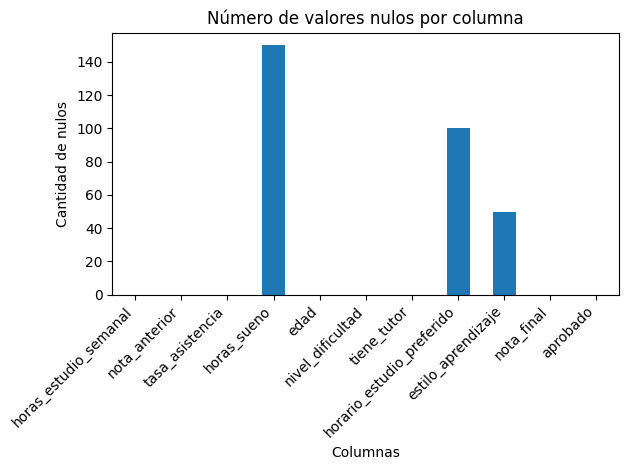

In [10]:
df.isnull().sum().plot(kind='bar')
plt.title("Número de valores nulos por columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de nulos")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

Se genera un gráfico de barras con el recuento de valores nulos por variable, de esta forma se facilita una lectura rápida y clara.

#### **Rangos de las variables**

In [11]:
rangos = {
    "horas_estudio_semanal": (0, 60),
    "nota_anterior": (0, 100),
    "tasa_asistencia": (0, 100),
    "horas_sueno": (0, 24),
    "edad": (18, 30),
    "nota_final": (0, 100)
}

for col, (low, high) in rangos.items():
    fuera = df[col].notna() & ((df[col] < low) | (df[col] > high))
    print(f"{col}: tiene {fuera.sum()} valores fuera de rango")

horas_estudio_semanal: tiene 0 valores fuera de rango
nota_anterior: tiene 0 valores fuera de rango
tasa_asistencia: tiene 0 valores fuera de rango
horas_sueno: tiene 0 valores fuera de rango
edad: tiene 0 valores fuera de rango
nota_final: tiene 0 valores fuera de rango


Se observa que ninguna variable presenta valores fuera de rango.

#### **Inconsistencias de valores**

In [12]:
aprobado_esperado = (df["nota_final"] >= 60).astype(int)
inconsistencias = df["aprobado"] != aprobado_esperado
print(f"En aprobado existen {inconsistencias.sum()} inconsistencias")

En aprobado existen 0 inconsistencias


## **5. Exploración y análisis de los tipos de variables**

#### **Variables numéricas**

In [13]:
columns_num = df.select_dtypes(include='number').columns.tolist()
print("Las variables numéricas son:", columns_num)

Las variables numéricas son: ['horas_estudio_semanal', 'nota_anterior', 'tasa_asistencia', 'horas_sueno', 'edad', 'nota_final', 'aprobado']


In [14]:
df.describe(include='number').round(2).T

,count,mean,std,min,25%,50%,75%,max
horas_estudio_semanal,1000.0,10.07,4.85,1.0,6.63,10.00,13.37,25.0
nota_anterior,1000.0,69.89,14.69,30.0,59.88,70.00,80.12,100.0
tasa_asistencia,1000.0,73.99,18.20,20.0,61.51,75.00,88.49,100.0
horas_sueno,850.0,7.01,1.44,4.0,6.00,7.02,8.02,10.0
edad,1000.0,23.53,3.48,18.0,21.00,24.00,27.00,29.0
nota_final,1000.0,71.44,9.56,30.0,64.78,71.40,77.90,100.0
aprobado,1000.0,0.90,0.30,0.0,1.00,1.00,1.00,1.0


**Observaciones:**

- `horas_estudio_semanal`: presenta una dispersión moderada y un rango amplio que va de 1 a 25 horas, lo que sugiere diferencias claras en el tiempo de dedicación entre estudiantes. La mediana 10.00 cercana a la media 10.07 indica una distribución relativamente equilibrada, aunque la desviación típica 4,85 indica diferencias notables en la dedicación al estudio.

- `nota_anterior`: las calificaciones previas se concentran alrededor de un valor central cercano a 70 puntos, con variabilidad apreciable. El amplio rango de valores, que va de 30 a 100, pone de manifiesto la coexistencia de rendimientos bajos y altos, lo que refleja un grupo claramente heterogéneo, aunque la mitad de los estudiantes se concentra aproximadamente entre 60 y 80 puntos.

- `tasa_asistencia`: los niveles de asistencia en general, son elevados, con una media cercana al 74 % y una mediana del 75 %. No obstante, la desviación estándar de 18,20 evidencia una variabilidad considerable entre estudiantes. A pesar de ello, los percentiles superiores muestran que una proporción significativa mantiene una asistencia alta, situándose el 75 % del alumnado por encima de aproximadamente el 61 % de asisitencia.

- `horas_sueno`: la media se sitúa en torno a 7 horas diarias y la variabilidad es baja, con una desviación estándar de 1,44. La mayoría de los valores se concentra entre 6 y 8 horas, lo que indica hábitos de sueño bastante estables y consistentes en la mayor parte de los estudiantes.

- `edad`: la muestra se concentra en edades cercanas a los veintitantos, con una media de 23,5 años y una mediana de 24. El rango va de 18 a 29 años y la desviación estándar de 3,48 indica una variabilidad moderada, lo que refleja un grupo mayoritariamente joven y relativamente homogéneo en cuanto a edad.

- `nota_final`: el rendimiento final se concentra en torno a un valor central cercano a 71 puntos, con una media de 71,44 y una mediana prácticamente igual. La variabilidad es moderada y la mayoría de las calificaciones se sitúa en un intervalo intermedio-alto, aproximadamente entre 65 y 78 puntos, aunque el rango completo alcanza hasta 100.

- `aprobado`: al tratarse de una variable binaria, su media de 0,90 indica que aproximadamente el 90 % de los estudiantes ha superado la asignatura, lo que refleja que la mayoría del conjunto cumple el criterio de aprobación y presenta un elevado nivel de éxito académico.

In [15]:
for col in columns_num:

    d = df[col].dropna()

    print(f"La columna {col} tiene un total de {d.nunique()} valores únicos\n")

    count_top10 = d.value_counts().head(10)
    print(f"Los 10 valores más frecuentes de {col} son:")
    print(count_top10, "\n")

    pct_top10 = (d.value_counts(normalize=True).head(10) * 100).round(2)
    print(f"El % de los 10 valores más frecuentes de {col} es:")
    print(pct_top10)

    print("\n" + "-" * 75 + "\n")

La columna horas_estudio_semanal tiene un total de 964 valores únicos

Los 10 valores más frecuentes de horas_estudio_semanal son:
horas_estudio_semanal
1.000000     36
25.000000     2
7.439697      1
14.688989     1
8.957476      1
6.407690      1
13.415889     1
16.237527     1
4.323579      1
7.928666      1
Name: count, dtype: int64 

El % de los 10 valores más frecuentes de horas_estudio_semanal es:
horas_estudio_semanal
1.000000     3.6
25.000000    0.2
7.439697     0.1
14.688989    0.1
8.957476     0.1
6.407690     0.1
13.415889    0.1
16.237527    0.1
4.323579     0.1
7.928666     0.1
Name: proportion, dtype: float64

---------------------------------------------------------------------------

La columna nota_anterior tiene un total de 975 valores únicos

Los 10 valores más frecuentes de nota_anterior son:
nota_anterior
100.000000    23
30.000000      4
81.878257      1
66.254179      1
73.089118      1
91.067997      1
96.979939      1
62.103747      1
71.829926      1
61.5800

**Observaciones:**

- `horas_estudio_semanal`: presenta una elevada diversidad de valores, con 964 valores únicos, lo que indica un comportamiento prácticamente continuo y diferencias notables en el tiempo dedicado al estudio. Aunque entre los valores más frecuentes aparecen distintas cantidades de horas, el valor que más se repite es 1 hora con 36 casos, un 3,6%; el resto de valores muestran frecuencias muy bajas, muchos con una sola aparición, por lo que no se observa un patrón clar dominante claro.

- `nota_anterior`: muestra una amplia variedad de calificaciones, con 975 valores únicos, reflejando una alta variabilidad en el rendimiento previo. Aunque los valores se distribuyen de forma muy repartida, se observan tanto puntuaciones extremas como valores más habituales, el valor más repetido es 100 con 23 casos, un 2,3%, y entre los más frecuentes aparece también 30 con 4 casos, un 0,4%, lo que confirma la coexistencia de estudiantes con resultados bajos y altos, sin un patrón único dominante.

- `tasa_asistencia`: se comporta como una variable muy granular, con 893 valores únicos. El valor más frecuente corresponde al 100% de asistencia con 106 casos, un 10,6%, lo que indica que un número relevante de estudiantes asiste a todas las clases. En el extremo opuesto, el 20% aparece solo 3 veces, un 0,3%, mientras que el resto de porcentajes se distribuyen con frecuencias muy bajas, reflejando distintos niveles de compromiso.

- `horas_sueno`: presenta una distribución muy dispersa, con 810 valores únicos, con mayor repetición en los extremos del rango. Destacan 4 horas con 22 casos, un 2,59% y 10 horas con 20 casos, un 2,35%, lo que sugiere acumulación en los límites y la posible presencia de patrones de descanso diferenciados. La mayoría de valores intermedios aparece con frecuencias muy reducidas cercanas a 1.

- `edad`: es una variable discreta y acotada, con 12 valores únicos de edades enteras. Las frecuencias se reparten de forma relativamente equilibrada, concentrándose en edades cercanas a los veintitantos, por ejemplo, 18 años aparece 94 veces, un 9,4%, 27 aparece 91, un 9,1% y 29 aparece 79, un 7,9%, lo que indica un grupo mayoritariamente joven y sin una edad claramente dominante.

- `nota_final`: presenta una dispersión moderada con 364 valores únicos, lo que sugiere cierta discretización. Las calificaciones más frecuentes se concentran en rangos intermedios, especialmente en torno a los 70 puntos, 74,6 y 72,8 aparecen 10 veces cada una, un 1%, y valores como 66, 69,4 y 72,0 aparecen 8 veces, un 0,8%. En conjunto, el rendimiento final es mayoritariamente medio, sin un valor único claramente predominante.

- `aprobado`: al ser una variable binaria, solo presenta 2 valores únicos y muestra un claro predominio del aprobado. El valor 1 aparece en 898 casos, un 89,8% frente a 0 en 102, un 10,2%, lo que confirma que la mayoría del alumnado supera la asignatura y evidencia un desequilibrio hacia la clase de aprobados.

#### **Visualización variables numéricas**

##### **Histogramas**

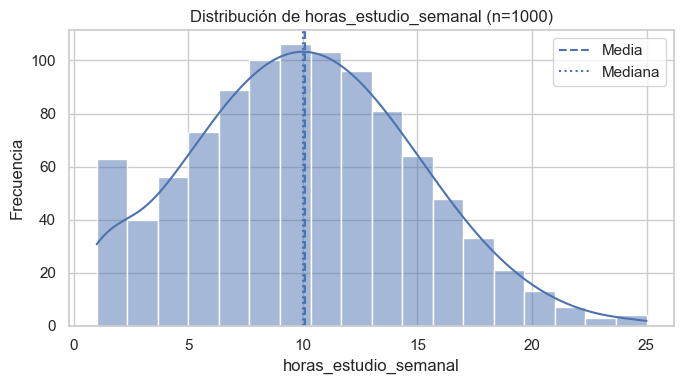

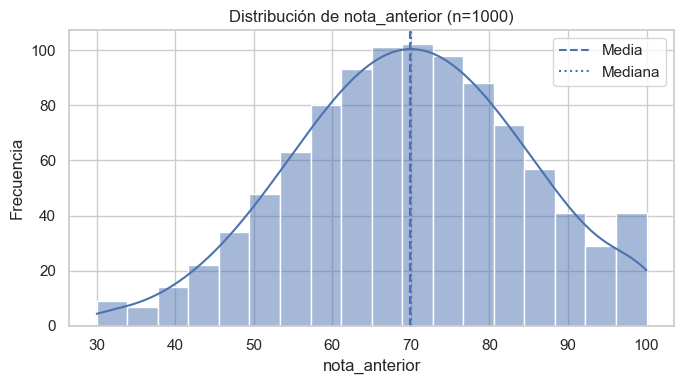

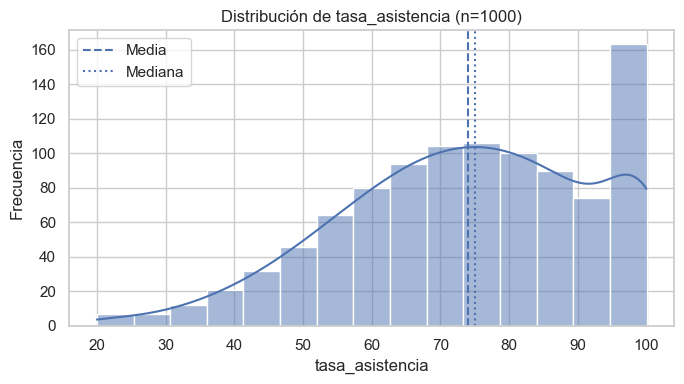

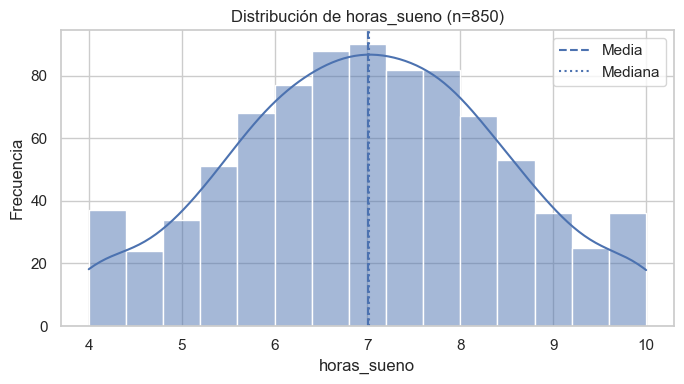

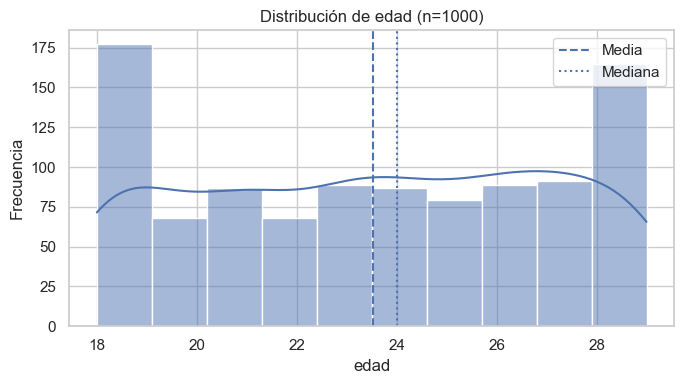

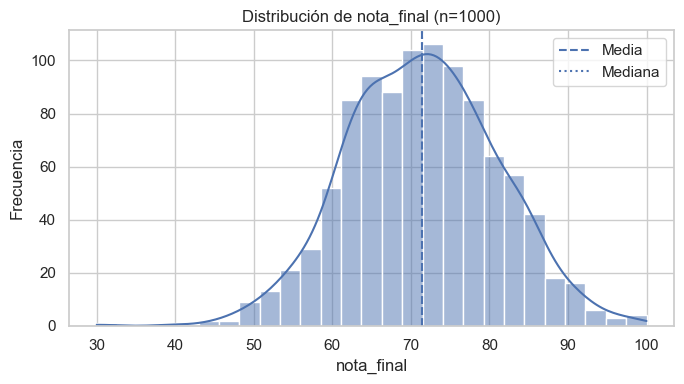

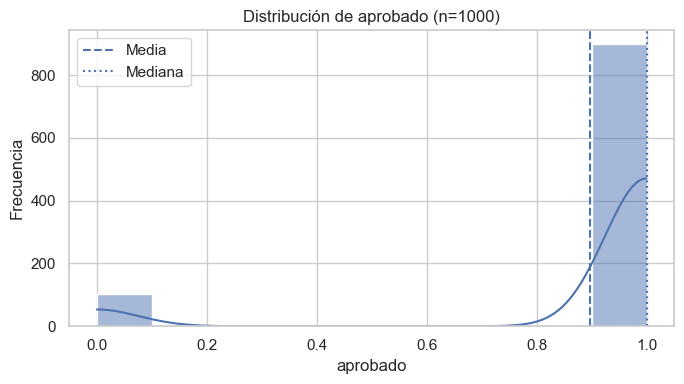

In [16]:
sns.set(style="whitegrid", context="notebook")

for col in columns_num:

    data = df[col].dropna()

    bin_edges = np.histogram_bin_edges(data, bins="fd")
    n_bins = max(10, min(50, len(bin_edges) - 1))  
    plt.figure(figsize=(7, 4))
    ax = sns.histplot(data, bins=n_bins, stat="count", kde=True)

    ax.axvline(data.mean(), linestyle="--", label="Media")
    ax.axvline(data.median(), linestyle=":", label="Mediana")
    ax.legend()

    plt.title(f"Distribución de {col} (n={len(data)})")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

    #

**Observaciones:**

- `horas_estudio_semanal`: distribución unimodal con el máximo cercano a 10 horas. Se aprecia una cola hacia valores altos de hasta 25, lo que sugiere ligera asimetría a la derecha. Media y mediana prácticamente coinciden, indicando que la asimetría es moderada y no domina la distribución.

- `nota_anterior`: distribución de tipo campana, centrada aproximadamente en 70. La media y la mediana están muy próximas, lo que indica una distribución bastante equilibrada. Se aprecian colas hacia valores bajos cercanos a 30 y hacia valores altos cercanos a 100, sin alteraciones destacables en la forma general de la distribución.

- `tasa_asistencia`: la masa principal se concentra en valores altos, aproximadament entre 60 y 100, se observa una acumulación notable cerca del 100, compatible con un efecto techo, ya que es el maximo que se puede alcanzar asistiendo a todas las clases. La media queda ligeramente por debajo de la mediana, lo que es coherente con una asimetría hacia la izquierda, con unos pocos valores bajos arrastran la media.

- `horas_sueno`: distribución aproximadamente simétrica y centrada en torno a 7 horas, con media y mediana casi solapadas. El rango está acotado entre 4 y 10 horas y se aprecia cierta concentración cerca de los límites, aunque la forma global mantiene un perfil suave y unimodal.

- `edad`: distribución acotada entre 18 y 29 años, relativamente homogénea a lo largo del rango, sin colas largas ni valores extremos destacables. La media es ligeramente menor que la mediana, lo que sugiere una leve inclinación hacia edades más bajas, pero sin una asimetría pronunciada.

- `nota_final`: distribución unimodal, centrada alrededor de 71, con un perfil cercano a una campana. Media y mediana prácticamente coinciden, indicando equilibrio en la distribución. Se aprecian colas hacia valores bajos cercanos a 30 y hacia valores altos cercanos a 100, sin indicios claros de que existan varios picos en la distribución.

- `aprobado`: al ser una variable binaria, la distribución está fuertemente concentrada en el valor 1, con una presencia mucho menor de 0. En consecuencia, la mediana se sitúa en 1 y la media queda por debajo, reflejando una distribución muy asimétrica, lo que muestra un desbalance entre clases.


##### **Boxplots**

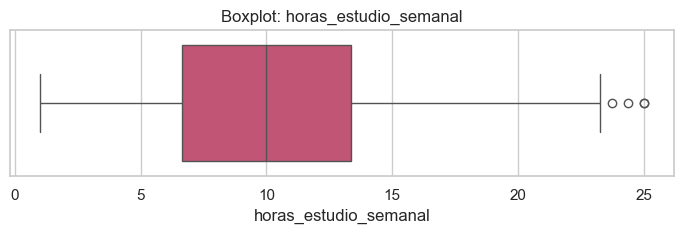

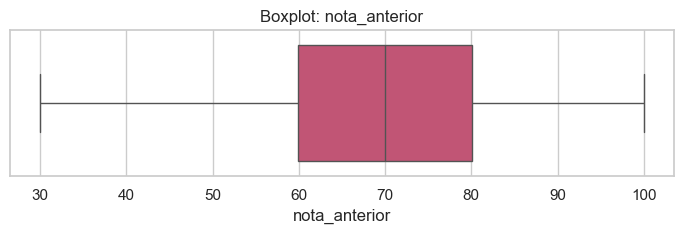

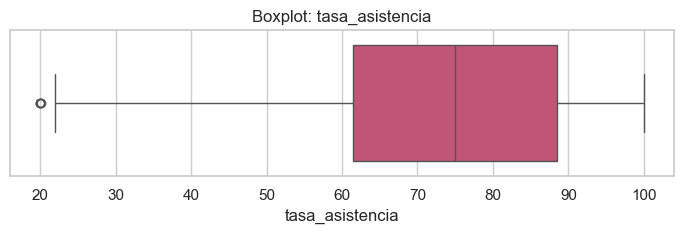

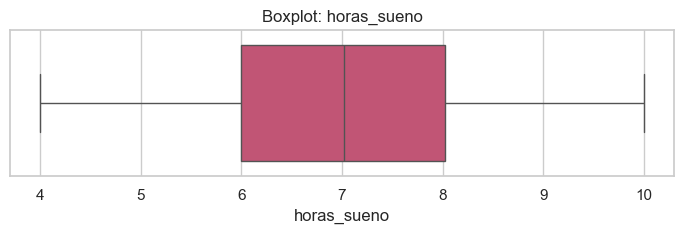

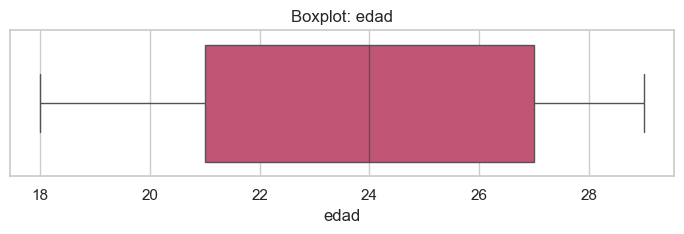

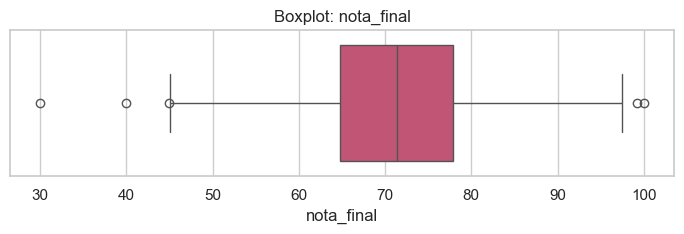

In [17]:
columns_num_plot = [c for c in columns_num if c != "aprobado"]

for col in columns_num_plot:
    data = df[col].dropna()

    plt.figure(figsize=(7, 2.5))
    sns.boxplot(x=data, orient="h", color=sns.color_palette("magma", 6)[3])

    plt.title(f"Boxplot: {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

**Observaciones:**

`horas_estudio_semanal`: la mediana se encuentra en 10 horas por semana y la mayor parte de los valores se concentran entre 7 y 13 horas, aparecen algunos valores más altos alrededor de 24 a 25 horas, que actúan como outliers.

`nota_anterior`: los valores centrales se agrupan principalmente entre 60 y 80 con una mediana en 70, el extremo inferior llega a valores bajos en torno a 30, lo que indica presencia de casos con rendimiento previo claramente inferior al resto, mientras que en el extremo superior los valores alcanzan el máximo de 100.

`tasa_asistencia`: la mediana se sitúa aproximadamente en 75 y la variabilidad central es moderada, con la mayoría entre 60 y 90, se observa algún caso atípico con asistencia muy baja alrededor de 20.

`horas_sueno`: la mediana se sitúa alrededor de 7 horas y la distribución es bastante compacta, con la mayoría entre 6 y 8 horas, además no se aprecian valores atípicos destacados.

`edad`: la mediana ronda 24 años y la mayoría se concentra entre 21 y 27, el rango es estrecho entre 18 y 29, y no se observan valores extremos.

`nota_final`: la mediana se sitúa en torno a 72 o 73 y la mayor parte de las notas se concentra entre 65 y 78, también aparecen algunos casos atípicos tanto en valores bajos que van desde 45 hasta 30, como en valores muy altos cercanos al máximo de 100.


#### **Variables categóricas**

In [18]:
columns_cate = df.select_dtypes(include= ['category', 'object']).columns.tolist()
print("Las variables categóricas son:", columns_cate)

Las variables categóricas son: ['nivel_dificultad', 'tiene_tutor', 'horario_estudio_preferido', 'estilo_aprendizaje']


In [19]:
df.describe( include='object').T

,count,unique,top,freq
nivel_dificultad,1000,3,Medio,504
tiene_tutor,1000,2,No,597
horario_estudio_preferido,900,3,Noche,344
estilo_aprendizaje,950,4,Visual,363


**Observaciones:**

- `nivel_dificultad`: el resumen confirma que es una variable con 3 categorías y que la moda es “Medio” con 504 apariciones, lo que indica que el nivel intermedio es el más habitual.

- `tiene_tutor`: se identifican 2 categorías y la más frecuente es “No” con 597 valores, sugiriendo que la mayoría no cuenta con tutor.

- `horario_estudio_preferido`: se observan 3 categorías y se destaca “Noche” como la más frecuente con 344 valores entre los registros válidos, apuntando a una preferencia por ese horario de estudio.

- `estilo_aprendizaje`: aparecen 4 categorías y la moda es “Visual” con 363 apariciones, lo que lo sitúa como el estilo predominante.

In [20]:
for col in columns_cate:

    print(f'La columna {col} tiene un total de {df[col].nunique(dropna=True)} valores únicos\n')

    print(f"Los valores de las categorías de {col} incluyendo nulos son:")
    print(df[col].value_counts(dropna=False), "\n")

    print(f"El % de los valores de las categorías de {col} incluyendo nulos es:")
    print((df[col].value_counts(normalize=True, dropna=False)*100).round(2))

    print("\n" + "-" * 80 + "\n")

La columna nivel_dificultad tiene un total de 3 valores únicos

Los valores de las categorías de nivel_dificultad incluyendo nulos son:
nivel_dificultad
Medio      504
Fácil      313
Difícil    183
Name: count, dtype: int64 

El % de los valores de las categorías de nivel_dificultad incluyendo nulos es:
nivel_dificultad
Medio      50.4
Fácil      31.3
Difícil    18.3
Name: proportion, dtype: float64

--------------------------------------------------------------------------------

La columna tiene_tutor tiene un total de 2 valores únicos

Los valores de las categorías de tiene_tutor incluyendo nulos son:
tiene_tutor
No    597
Sí    403
Name: count, dtype: int64 

El % de los valores de las categorías de tiene_tutor incluyendo nulos es:
tiene_tutor
No    59.7
Sí    40.3
Name: proportion, dtype: float64

--------------------------------------------------------------------------------

La columna horario_estudio_preferido tiene un total de 3 valores únicos

Los valores de las categorías d

**Observaciones:**

- `nivel_dificultad`: presenta tres categorías. Predomina el nivel Medio con 504 registros, seguido de Fácil con 313 y Difícil con 183, lo que indica que la mayoría de los estudiantes percibe la dificultad como intermedia.

- `tiene_tutor`: muestra un desabalance de categorías, la opción No es la más frecuente con 597 casos, frente a Sí con 403, lo que muestra que la mayoría no dispone de tutor, aunque ambas categorías están razonablemente representadas.

- `horario_estudio_preferido`: incluye tres categorías con una distribución bastante equilibrada entre Noche con 344 y Tarde con 337, mientras que Mañana es menos frecuente con 219 casos. Esto sugiere una ligera preferencia por estudiar en horarios más nocturnos.

- `estilo_aprendizaje`: presenta cuatro categorías. El estilo Visual es el más común con 363 registros, seguido de Auditivo con 254, Kinestésico con 178 y Lectura/Escritura con 155, lo que indica una diversidad de estilos de aprendizaje, con predominio del visual.

#### **Visualización variables categóricas**

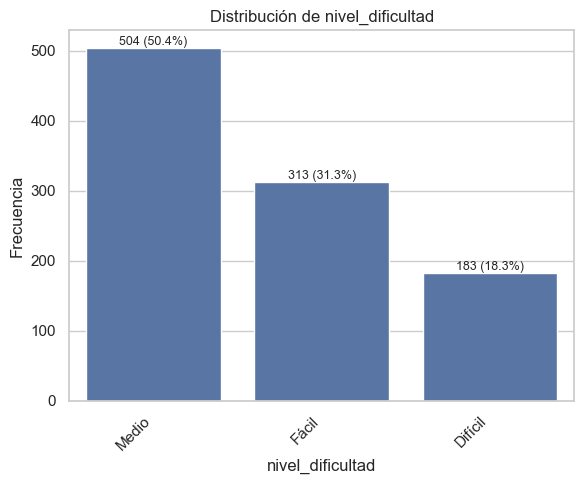

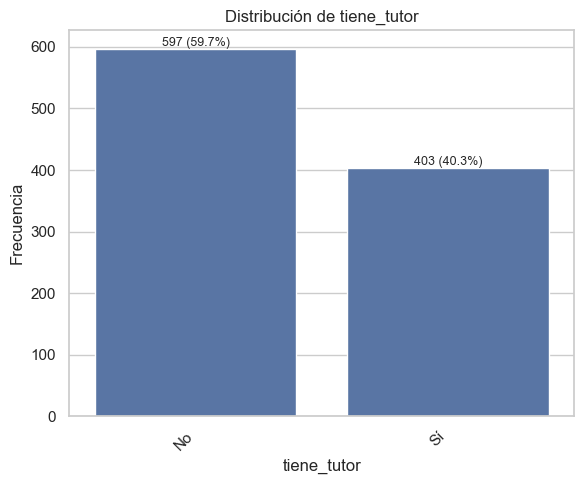

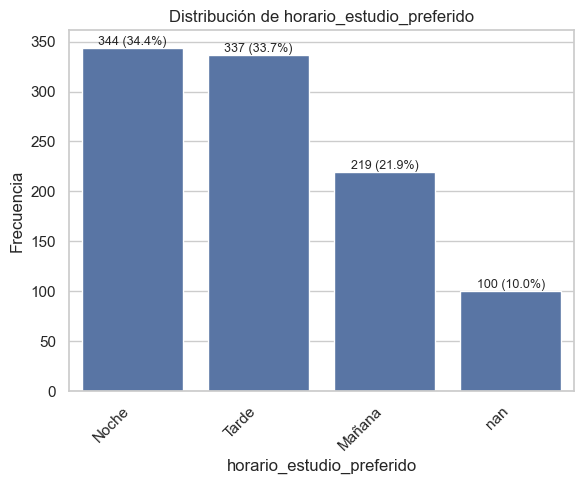

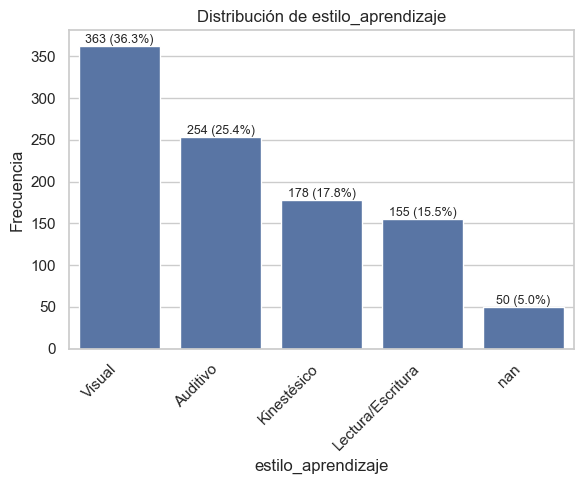

In [21]:
for col in columns_cate:
    counts = df[col].value_counts(dropna=False)

    x = counts.index.astype(str)
    y = counts.values

    plt.figure(figsize=(6, 5))
    ax = sns.barplot(x=x, y=y, order=x)

    total = y.sum()
    for i, v in enumerate(y):
        ax.text(i, v, f"{v} ({v/total:.1%})", ha="center", va="bottom", fontsize=9)

    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

**Observaciones:**

- `nivel_dificultad`: la representación muestra un claro predominio del nivel Medio con un 50,4%, seguido de Fácil con un 31,3% y Difícil con un 18,3%, con una disminución progresiva entre categorías. Visualmente, la distribución queda concentrada en el nivel intermedio.

- `tiene_tutor`: se aprecia un reparto moderadamente desequilibrado, con mayor peso de No con un 59,7%, frente a Sí con un 40,3%. La diferencia es visible, pero ambas categorías mantienen una presencia significativa.

- `horario_estudio_preferido`: se observa una distribución muy similar entre Noche con un 34,4% y Tarde con un 33,7%, mientras que Mañana con un 21,9% queda por debajo. Además, aparece una proporción relevante de valores nulos con un 10,0%, por debajo del resto de variables.

- `estilo_aprendizaje`: la distribución es más diversificada, con predominio de Visual con un 36,3% y una presencia notable de Auditivo con un 25,4%, seguidos por Kinestésico con un 17,8% y Lectura/Escritura con un 15,5%. Los valores nunlos son reducidos con un 5,0% lo que no tiene una gran representación.


## **6. Análisis de correlación entre variables numéricas**

#### **Matriz de correlación**

In [22]:
targets = ["nota_final", "aprobado"]
num_corre = [c for c in columns_num if c not in targets]
corr_matrix = df[num_corre].corr(method='pearson').round(2)
corr_matrix.round(2)

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad
horas_estudio_semanal,1.00,0.43,0.16,0.08,-0.01
nota_anterior,0.43,1.00,0.28,0.07,-0.02
tasa_asistencia,0.16,0.28,1.00,0.11,0.05
horas_sueno,0.08,0.07,0.11,1.00,0.10
edad,-0.01,-0.02,0.05,0.10,1.00


### **Heatmap**

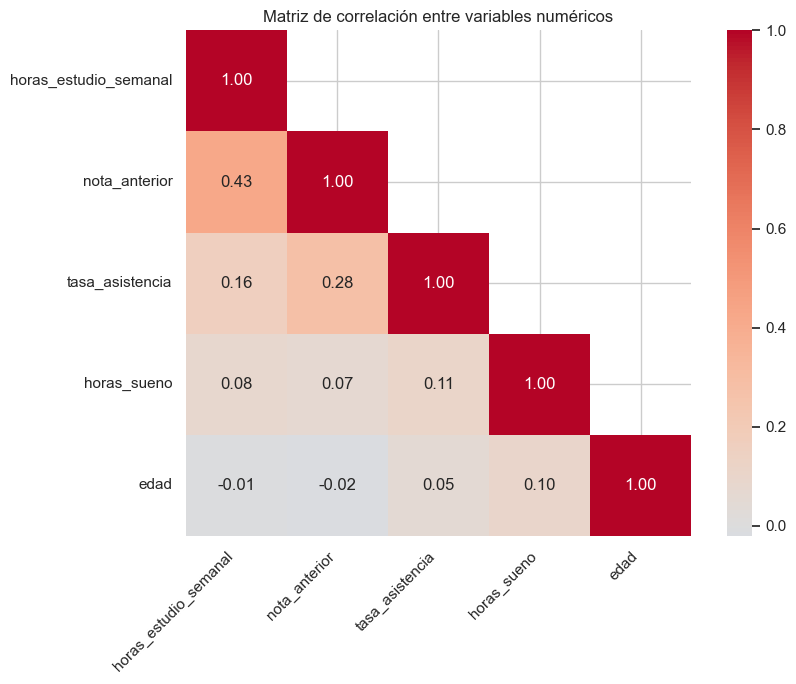

In [23]:
plt.figure(figsize=(9, 7))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)

plt.title("Matriz de correlación entre variables numéricos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Observaciones:**

Correlaciones más destacadas

- La relación más alta aparece entre `horas_estudio_semanal` y `nota_anterior`, con una correlación moderada de 0,43. Esto sugiere que quienes obtuvieron mejores resultados en la convocatoria anterior tienden, a dedicar más horas de estudio semanal.

- También se observa una correlación positiva entre `nota_anterior` y `tasa_asistencia`, con 0,28, lo que indica que una mayor asistencia se asocia de forma moderada con mejores resultados previos.

Correlaciones de menor intensidad

- `horas_estudio_semanal` y `tasa_asistencia` presentan una correlación baja de 0,16, lo que apunta a una relación positiva ligera entre estudiar más horas y asistir más a clase.

- `tasa_asistencia` y `horas_sueno` muestran una correlación baja de 0,11, y `horas_sueno` con edad una correlación baja de 0,10. Son relaciones débiles que no parecen explicar grandes diferencias por sí solas.

Correlaciones casi nulas

- `horas_sueno` tiene correlaciones muy bajas con `horas_estudio_semanal` de 0,08 y con nota_anterior de 0,07, lo que sugiere poca relación lineal entre sueño y estas variables.

- `edad` presenta correlaciones prácticamente nulas con `horas_estudio_semanal` de -0,01 y con nota_anterior de -0,02, por lo que la edad no parece estar relacionada de forma apreciable con el tiempo de estudio ni con el rendimiento previo en esta muestra.

#### **Correlación de variables numéricas con la nota final**

In [24]:
corr_target = df[num_corre + ["nota_final"]].corr()["nota_final"].sort_values(ascending=False)
corr_target

nota_final               1.000000
horas_estudio_semanal    0.513565
nota_anterior            0.469787
tasa_asistencia          0.316773
horas_sueno              0.074635
edad                    -0.012204
Name: nota_final, dtype: float64

**Observación:**

La variable con mayor relación lineal con `nota_final` es `horas_estudio_semanal`, seguida de `nota_anterior`, ambas con correlaciones moderadas, lo que sugiere que más horas de estudio y mejores resultados previos se asocian con una mejor nota final. <br>
La `tasa_asistencia` muestra una relación positiva pero más débil, mientras que `horas_sueno` y `edad` presentan correlaciones muy bajas, por lo que su asociación lineal con la nota final parece limitada en esta muestra.

## **7. Análisis bivariante con objetivos**

Objetivo: analizar cómo se relaciona cada variable con las dos variables objetivo.

- Regresión: `nota_final`

- Clasificación: `aprobado`

### **Análisis bivariante para Regresión**

#### **Numéricas vs `nota_final`**

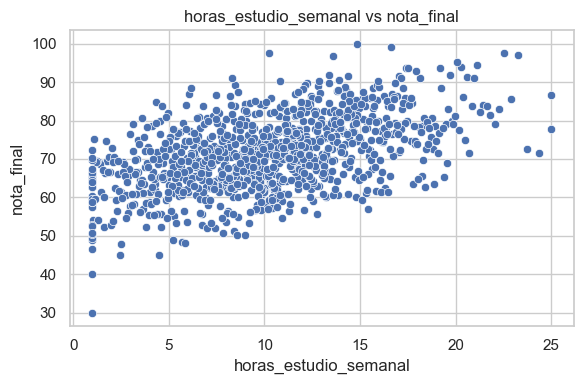

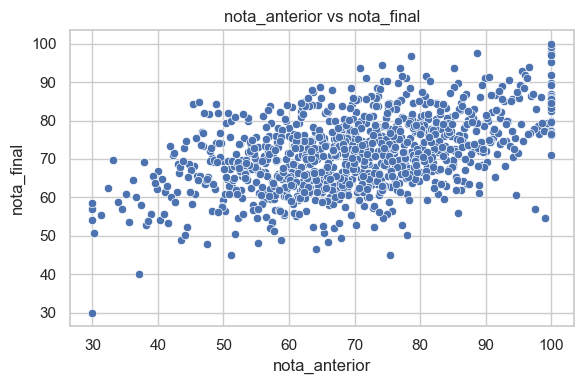

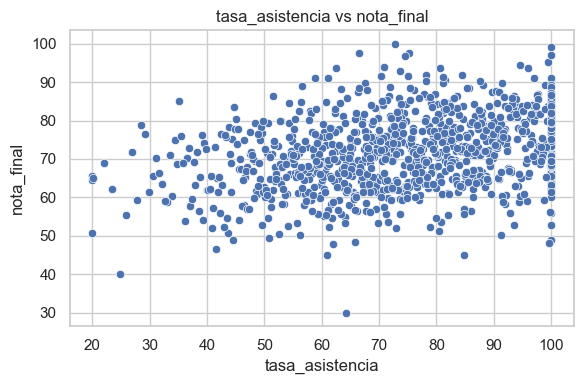

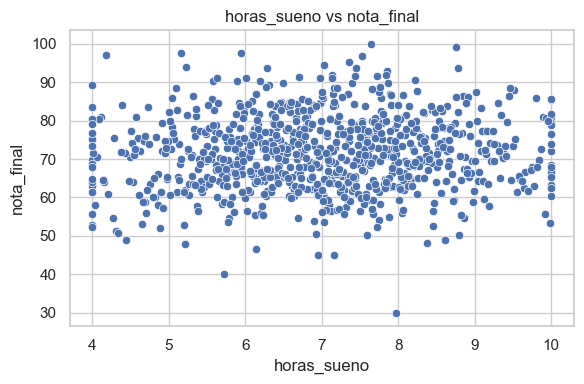

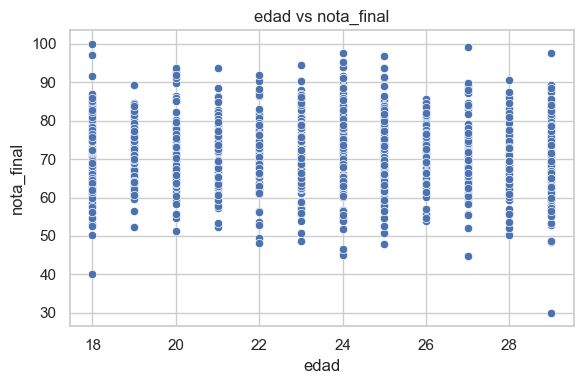

In [25]:
vars_num = [c for c in columns_num if c not in ["aprobado", "nota_final"]]

for col in vars_num:
    
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df["nota_final"])
    plt.title(f"{col} vs nota_final")
    plt.xlabel(col)
    plt.ylabel("nota_final")
    plt.tight_layout()
    plt.show()

**Observaciones:**

`horas_estudio_semanal` vs `nota_final`: se observa una tendencia positiva, a medida que aumentan las horas de estudio, las notas finales tienden a ser más altas. Aun así, hay dispersión notable para un mismo nivel de horas, lo que sugiere que influyen otros factores además del tiempo de estudio.

`nota_anterior` vs `nota_final`: relación positiva muy marcada, quienes parten de una nota anterior más alta suelen obtener mejores resultados finales. La nube esta más alineada en comparación con variables, lo que indica que el rendimiento previo es un predictor relevante.

`tasa_asistencia` vs `nota_final`: la relación es positiva pero más moderada, a mayores niveles de asistencia se concentran más puntos en notas medias y altas, aunque hay bastante variabilidad. Se aprecia acumulación en asistencia cercana a 100, lo que puede limitar la capacidad de distinguir alumnos solo por esta variable.

`horas_sueno` vs `nota_final`: no se aprecia una tendencia lineal clara, ya que las notas se distribuyen de forma similar a lo largo del rango de sueño. Esto sugiere que, al menos linealmente, el sueño tiene un efecto limitado en la nota final en este conjunto.

`edad` vs `nota_final`: no se observa un patrón relevante, las notas aparecen repartidas de forma parecida en la mayoría de edades. La edad, por sí sola, no parece explicar diferencias destacables en el rendimiento final.

#### **Categóricas vs `nota_final`** 

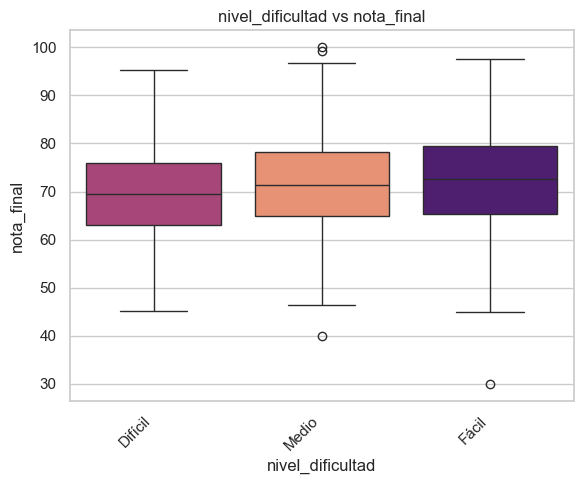

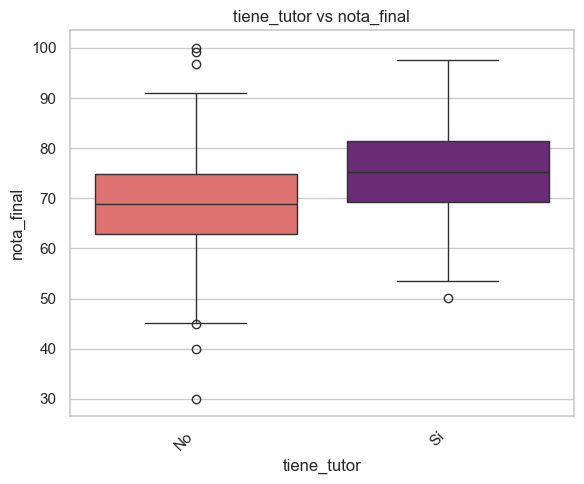

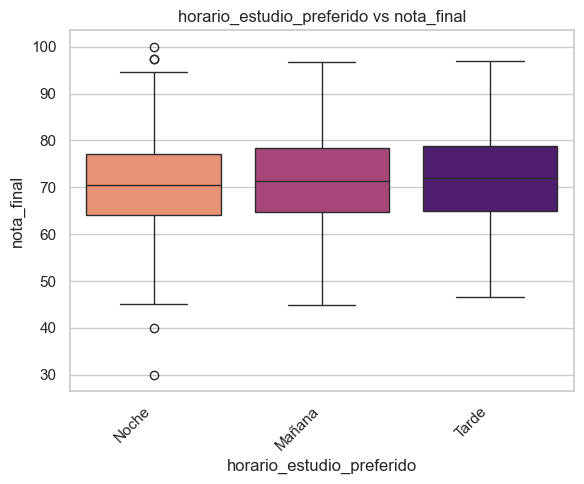

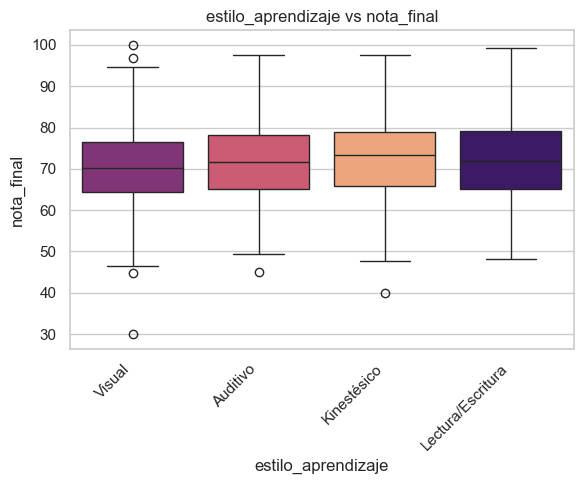

In [26]:
tv = 'nota_final'

for col in columns_cate: 

    num_cats = df[col].nunique()

    fig_width = min(max(6, num_cats * 1.5), 25)
    fig_height = 5

    ordered_cats = df.groupby(col)[tv].mean().sort_values().index

    plt.figure(figsize = (fig_width, fig_height))
    sns.boxplot(x = df[col], y= df[tv], hue=df[col], data=df, order=ordered_cats, palette="magma", legend=False)
    plt.title(f"{col} vs {tv}")
    plt.xlabel(col)
    plt.ylabel(tv)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

**Observaciones:**

`nivel_dificultad` vs `nota_final`: las medianas suben ligeramente de Difícil a Medio y a Fácil, indicando mejores resultados cuando la dificultad percibida es menor. Aun así, hay bastante solapamiento entre grupos, por lo que la dificultad no determina por sí sola la nota final.

`tiene_tutor` vs `nota_final`: el grupo que si tiene tutor presenta un desplazamiento hacia notas más altas con una mediana y cuartiles más elevados, mientras que el grupo que no tiene tutor concentra valores más bajos y algunos valores atípicos, lo que sugiere una asociación positiva del tutor con el rendimiento, además es la categórica donde la diferencia entre grupos se ve más marcada.

`horario_estudio_preferido` vs `nota_final`: las tres categorías muestran distribuciones muy parecidas y medianas muy proximas, sin una separación clara. El horario preferido parece tener un efecto limitado en la nota final, con algunos valores atípicos en el horario de Noche.

`estilo_aprendizaje` vs `nota_final`: las diferencias entre las categorías son moderadas, Kinestésico y Lectura/Escritura tienden a medianas algo más altas, pero las cajas se solapan. Esto indica que el estilo de aprendizaje podría influir, pero su efecto parece menor en comparación con otras variables del dataset.

### **Análisis bivariante para Clasificación**

#### **Balance de clases**

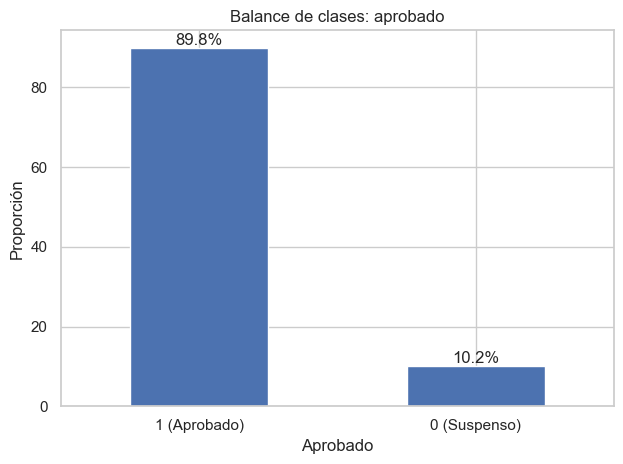

In [46]:
pct = (df["aprobado"].value_counts(normalize=True) * 100).sort_values(ascending=False)
pct.index = pct.index.map({1: "1 (Aprobado)", 0: "0 (Suspenso)"})
ax = pct.plot(kind="bar")

for i, v in enumerate(pct.values):
    ax.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.title("Balance de clases: aprobado")
plt.xlabel("Aprobado")
plt.ylabel("Proporción")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Observaciones:**

Se observa un fuerte desbalance de clases en la variable aprobado, aproximadamente el 89,8% de los registros pertenecen a 1 (Aprobado), mientras que solo el 10,2% pertenecen a 0 (Suspenso). <br>
En la fase de modelado habrá que tener en cuenta este desbalance para que el modelo no se limite a predecir siempre “Aprobado”, ya que es importante contemplar el rendimiento en la clase “Suspenso”, que aparece con mucha menor frecuencia.

#### **Numéricas vs `aprobado`**

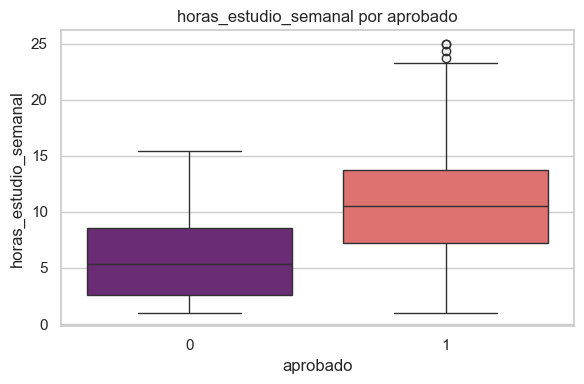

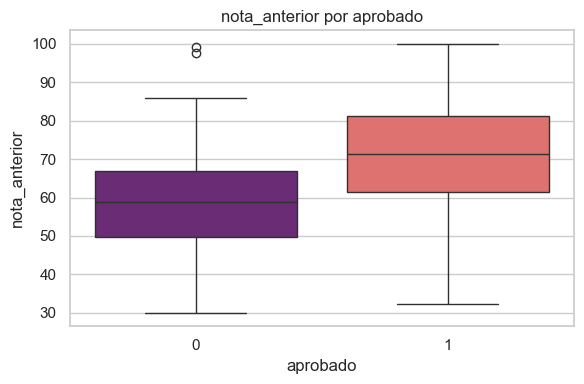

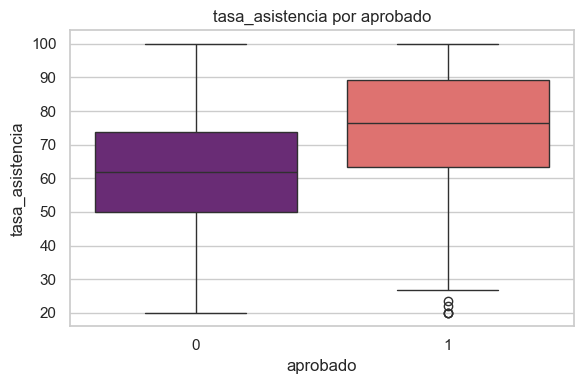

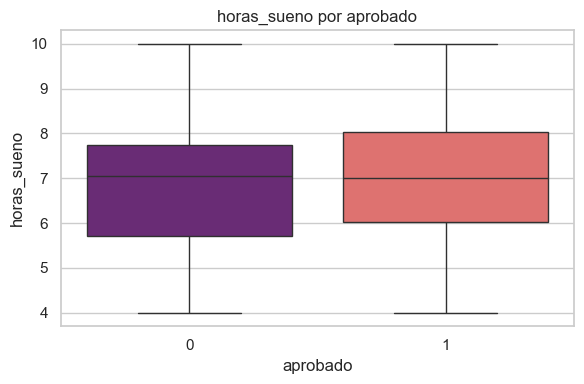

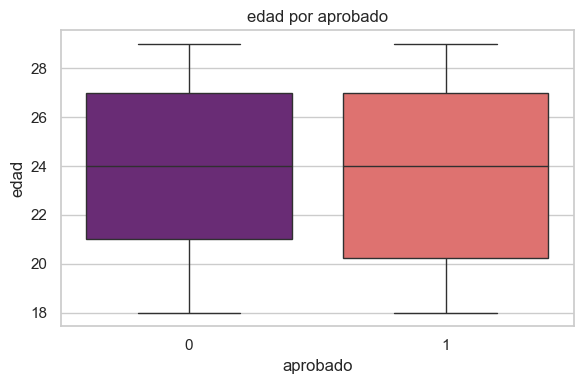

In [67]:
for col in vars_num:
    
    plt.figure(figsize=(6,4))
    sns.boxplot(x="aprobado", y=col, hue="aprobado", data=df, palette="magma", legend=False)
    plt.title(f"{col} por aprobado")
    plt.xlabel("aprobado")
    plt.ylabel(col)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

**Observaciones:**

`horas_estudio_semanal` por `aprobado`: el grupo aprobado presenta una mediana claramente más alta y un rango intercuartílico desplazado hacia más horas de estudio. Además, aparecen varios valores atípicos en aprobados, lo que indica algunos estudiantes con dedicación semanal muy superior al resto, en suspenso predominan valores más bajos y con menos extremos.

`nota_anterior` por `aprobado`: los aprobados parten de una nota anterior típicamente mayor, con la distribución centrada en valores superiores, mientras que en suspenso la mediana es menor y se observan algunos atípicos altos que muestran casos puntuales con buena nota previa que aun así no aprobaron.

`tasa_asistencia` por `aprobado`: los aprobados muestran una asistencia más alta en general, con una caja situada en valores superiores. Destacan varios valores atípicos bajos en el grupo aprobado, indicando casos aislados de estudiantes que aprueban pese a una asistencia muy baja, en suspenso la distribución se desplaza hacia asistencias más bajas y con mayor variabilidad.

`horas_sueno` por `aprobado`: las distribuciones son muy similares entre ambos grupos, con medianas cercanas y solapamiento amplio, no se observan valores atípicos que destaquen, lo que refuerza la ausencia de una diferencia clara de horas de sueño entre aprobados y suspensos.

`edad` por `aprobado`: no se observa separación entre clases, las medianas son prácticamente iguales y las cajas se solapan casi por completo, lo que sugiere que la edad parece aportar poca información para distinguir entre aprobado y suspenso.

#### **Categóricas vs `aprobado`**

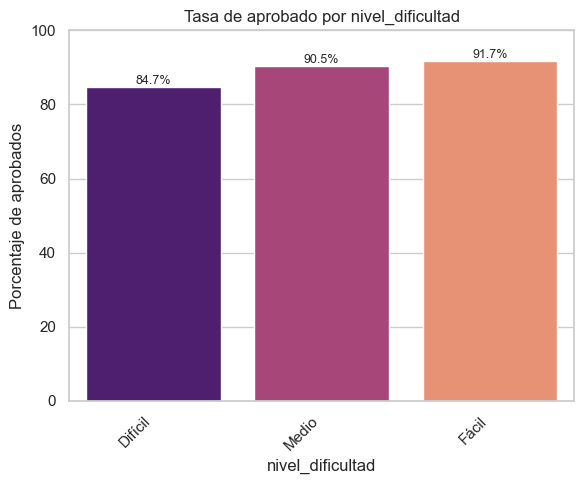

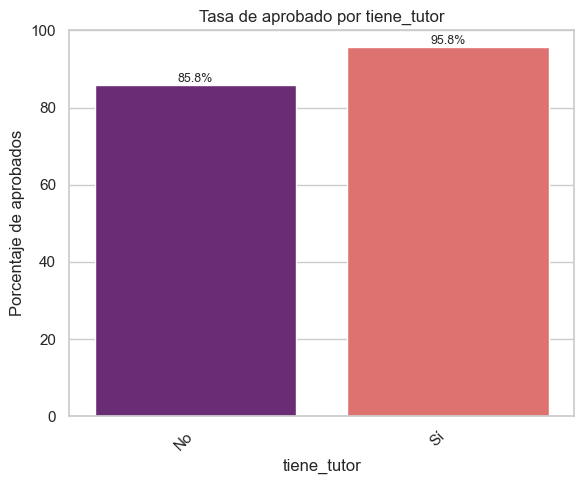

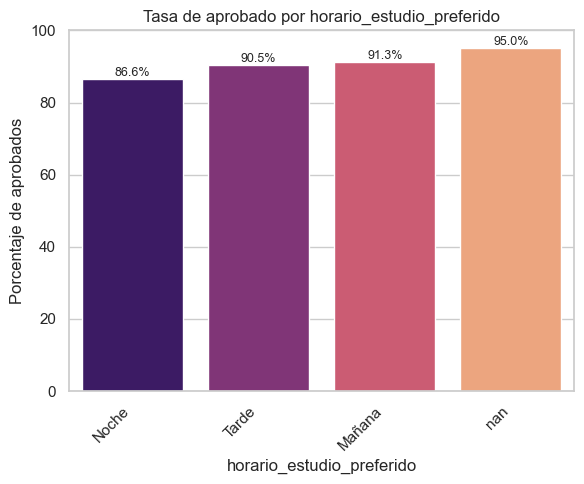

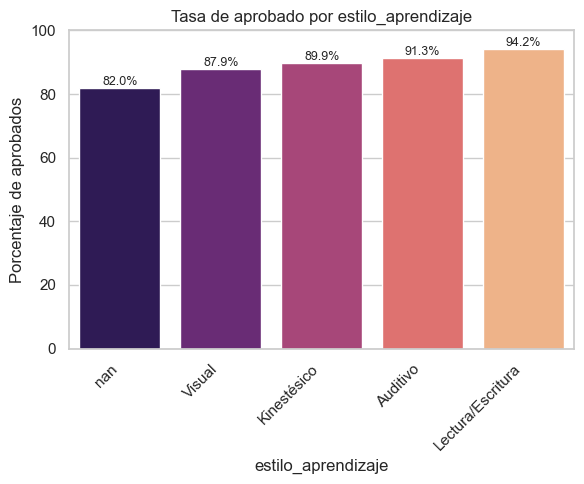

In [76]:
for col in columns_cate:
    # Incluir nulos como grupo (NaN) para calcular la tasa
    tmp = df[[col, "aprobado"]].copy()
    tmp[col] = tmp[col].astype("object").fillna("nan")  # solo para agrupar y mostrar como "nan"

    rate = tmp.groupby(col, dropna=False)["aprobado"].mean().sort_values()

    x = rate.index.astype(str)
    y = rate.values * 100

    plt.figure(figsize=(6, 5))
    ax = sns.barplot(x=x, y=y, hue=x, palette="magma", legend=False)

    for i, v in enumerate(y):
        ax.text(i, v, f"{v:.1f}%", ha="center", va="bottom", fontsize=9)

    plt.title(f"Tasa de aprobado por {col}")
    plt.xlabel(col)
    plt.ylabel("Porcentaje de aprobados")
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

**Observaciones:**

Tasa de aprobado por `nivel_dificultad`: se observa una tendencia ascendente en la tasa de aprobado desde Difícil hasta Fácil, indicando que cuanto menor es la dificultad reportada, mayor proporción de estudiantes aprueba.

Tasa de aprobado por `tiene_tutor`: contar con tutor se asocia con una tasa de aprobado claramente superior frente a no tenerlo, siendo una de las separaciones más marcadas entre categorías.

Tasa de aprobado por `horario_estudio_preferido`: las diferencias entre horarios son moderadas y no hay un patrón muy acusado entre Noche, Tarde y Mañana. El grupo con valores nulos aparece con la tasa más alta, por lo que conviene tenerlo en cuenta y comprobar si el missing está asociado a algún perfil concreto.

Tasa de aprobado por `estilo_aprendizaje`: se observan variaciones entre los distintos estilos Lectura/Escritura y Auditivo muestran tasas más altas, mientras que el grupo con valores nulos presenta la más baja, lo que muestra un comportamiento distinto al resto, por lo que conviene considerarlo como una categoría aparte en el análisis y comprobar si está asociado a algún patrón específico relacionado con los estudiantes.

## **8. Conclusiones del EDA y decisiones de preproceso**

#### **Principales hallazgos del EDA**

**Relación con `nota_final`:**

- Las variables numéricas con mayor asociación lineal con la nota final son `horas_estudio_semanal`, `nota_anterior` y `tasa_asistencia`. En los gráficos de dispersión se aprecia una tendencia positiva más clara en las dos primeras, mientras que la asistencia muestra una relación positiva más moderada.

- `horas_sueno` y `edad` presentan una relación muy débil con `nota_final`, por lo que su efecto parece limitado de forma aislada.

**Relación con `aprobado`:**

- Existe un desbalance de clases en `aprobado`, con clara mayoría de aprobados.

- En los boxplots por clase, `horas_estudio_semanal`, `nota_anterior` y `tasa_asistencia` muestran una separación más evidente entre aprobados y suspensos. En cambio, horas_sueno y edad apenas diferencian ambas clases.

**Variables categóricas:**

- `tiene_tutor` y `nivel_dificultad` muestran diferencias apreciables tanto en `nota_final` como en la tasa de aprobado.

- `horario_estudio_preferido` y `estilo_aprendizaje` presentan diferencias más moderadas y con solapamiento, por lo que su contribución puede ser secundaria, aunque potencialmente útil combinada con otras variables.

#### **Decisiones de preprocesamiento**

**Separación de objetivos y variables predictoras:**

- Para regresión: se modelará `nota_final` como variable objetivo.

- Para clasificación: se modelará `aprobado` como variable objetivo.

- En el modelo de clasificación no se utilizará `nota_final` como predictor, ya que aprobado está definido a partir de `nota_final` y supondría fuga de información.

**Tratamiento de valores nulos:**

- En EDA los valores nulos pueden mostrarse como grupo nan para analizar su comportamiento, pero la imputación se realizará en la fase de preprocesamiento mediante pipelines.

- Variables categóricas con nulos: se imputarán con una categoría constante, por ejemplo "Desconocido", o con la moda si se considera más apropiado tras validación.

- Variables numéricas con nulos: se imputarán con la mediana como opción base por robustez frente a valores extremos.

- De forma opcional, se podrá activar un indicador de nulos en la imputación para comprobar si el hecho de faltar el dato aporta información al modelo.

**Codificación de variables categóricas:**

- Se aplicará One-Hot Encoding a las variables categóricas para que puedan ser utilizadas por los modelos.

- Se configurará para manejar categorías no vistas en test, evitando errores en la validación.

**Escalado de variables numéricas:**

- Se evaluará el uso de escalado en modelos sensibles a la escala como regresión lineal, logística o SVM.

- Para modelos basados en árboles, como Decision Tree, Random Forest, Gradient Boosting, el escalado no es estrictamente necesario.

**Partición y validación**

- Se utilizará partición estratificada en clasificación para mantener la proporción de clases en train/test.

- Dado el desbalance, se priorizarán métricas que reflejen el rendimiento en la clase minoritaria (por ejemplo, F1 o recall) además de la accuracy.

**Organización del proyecto**

Este notebook se mantiene centrado en EDA. Las transformaciones que afecten a los datos para modelado (imputación, encoding, escalado) se implementarán en la fase 2 mediante pipelines reproducibles, evitando modificar el dataset original y reduciendo el riesgo de fuga de información.